In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
raw_data=pd.read_csv('https://raw.githubusercontent.com/Huntler-Ganguly/group-project-dataset/master/train_csv.csv',error_bad_lines=False)
raw_data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
raw_data.drop(['ID'], axis = 1, inplace = True)
raw_data.reset_index(drop = True, inplace = True)

In [ ]:
raw_data.describe()

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [ ]:
targets = ['Salary',
          'DOJ',
          'DOL',
          'Designation',
          'JobCity']

In [ ]:
features = ['Gender',
            'DOB',
            '10percentage',
            '10board',
            '12graduation',
            '12percentage',
            '12board',
            'CollegeID',
            'CollegeTier',
            'Degree',
            'Specialization',
            'CollegeGPA',
            'CollegeCityID',
            'CollegeCityTier',
            'CollegeState',
            'GraduationYear',
            'English',
            'Logical',
            'Quant',
            'Domain',
            'ComputerProgramming',
            'ElectronicsAndSemicon',
            'ComputerScience',
            'MechanicalEngg',
            'ElectricalEngg',
            'TelecomEngg',
            'CivilEngg',
            'conscientiousness',
            'agreeableness',
            'extraversion',
            'nueroticism',
            'openess_to_experience']

In [ ]:
cat_features =['Gender',
               'DOB',
               '10board',
               '12graduation',
               '12board',
               'CollegeID',
               'CollegeTier',
               'Degree',
               'Specialization',
               'CollegeCityID',
               'CollegeCityTier',
               'CollegeState',
               'GraduationYear']

In [ ]:
domain_scores = ['Domain',
                 'ComputerProgramming',
                 'ElectronicsAndSemicon',
                 'ComputerScience',
                 'MechanicalEngg',
                 'ElectricalEngg',
                 'TelecomEngg',
                 'CivilEngg']

In [ ]:
personality_scores = ['conscientiousness',
                      'agreeableness',
                      'extraversion',
                      'nueroticism',
                      'openess_to_experience']

In [ ]:
academic_scores = ['10percentage',
                   '12percentage',
                   'collegeGPA']

In [ ]:
std_test_scores = ['English',
                   'Logical',
                   'Quant']

In [ ]:
print("Number of features: {}\nNumber of organised features: {}"
      .format(len(features), 
             len(cat_features) + 
             len(domain_scores) +
             len(personality_scores) + 
             len(academic_scores) +
             len(std_test_scores)))

Number of features: 32
Number of organised features: 32


In [ ]:
drop_features = ['DOB',
                '10board',
                '12graduation',
                '12board',
                'CollegeID',
                'CollegeCityID',
                'CollegeCityTier']

drop_targets = ['DOJ',
                'DOL',
                'Designation',
                'JobCity']

In [ ]:
data = raw_data.drop(drop_features + drop_targets, axis = 1)
cat_features = list(set(cat_features) - set(drop_features))
cat_features

['GraduationYear',
 'CollegeTier',
 'Gender',
 'Specialization',
 'CollegeState',
 'Degree']

In [ ]:
data.columns

Index(['Unnamed: 0', 'Salary', 'Gender', '10percentage', '12percentage',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [ ]:
data.isin([-1, 'NaN']).sum()

Unnamed: 0                  0
Salary                      0
Gender                      0
10percentage                0
12percentage                0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
dtype: int64

In [ ]:
for i in domain_scores:
    data[i].replace(to_replace = -1, value = 0, inplace = True)
data.isin([-1, 'NaN']).sum()

Unnamed: 0               0
Salary                   0
Gender                   0
10percentage             0
12percentage             0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [ ]:
data_good = data.copy()

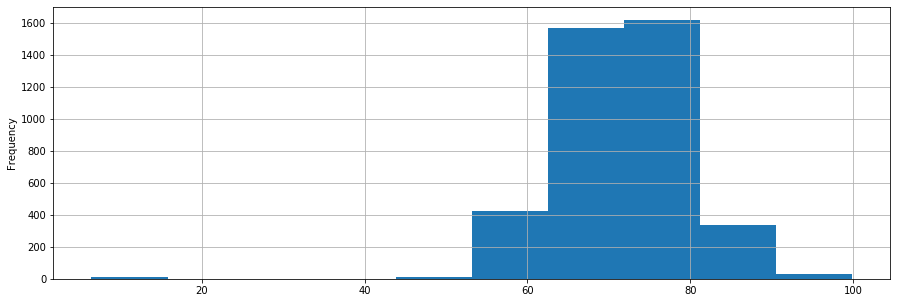

In [ ]:
data['collegeGPA'].plot(kind = 'hist', figsize = (15, 5), grid = True)

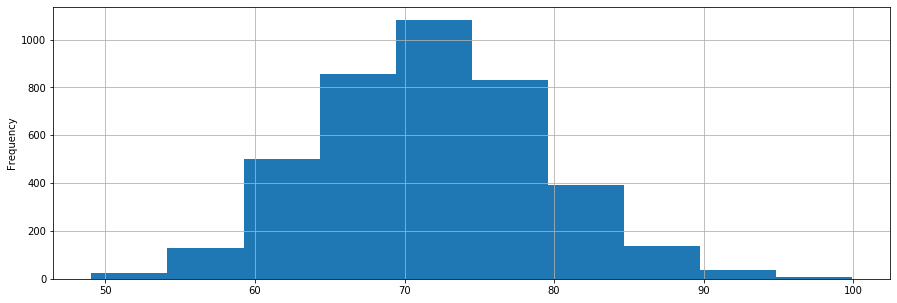

In [ ]:
data.loc[data['collegeGPA'] <= 10, 'collegeGPA'] *= 10
data['collegeGPA'].plot(kind = 'hist', figsize = (15, 5), grid = True)

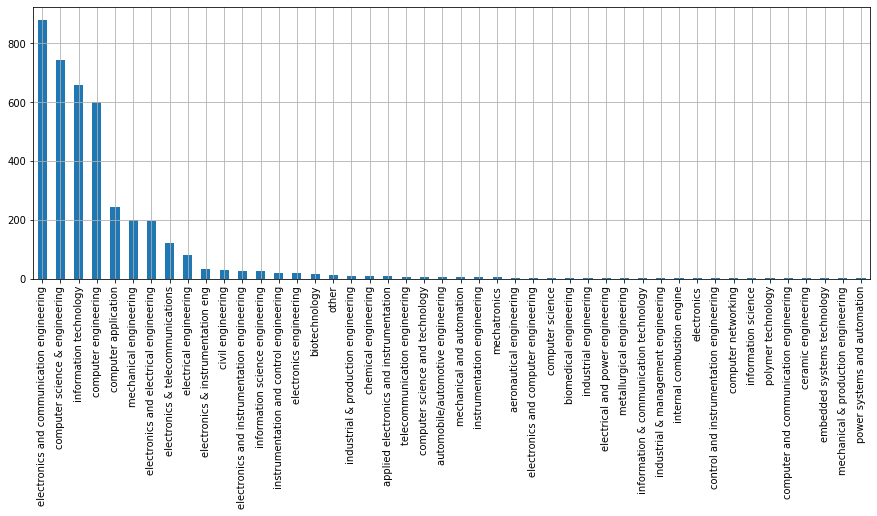

In [ ]:
specialization_freq = data['Specialization'].value_counts()
specialization_freq.plot(kind = 'bar', figsize = (15, 5), grid = True)

In [ ]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

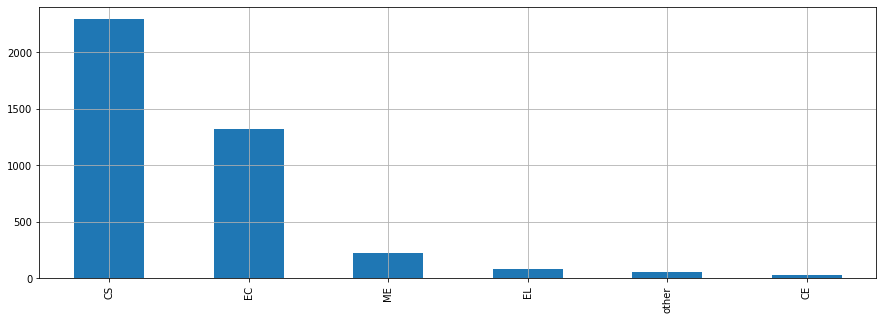

In [ ]:
data['Specialization'] = data['Specialization'].map(specialization_map)
data['Specialization'].value_counts().plot(kind = 'bar', figsize = (15, 5), grid = True)

**visualization**

gender ration

In [ ]:
num_males = data['Gender'].where(data['Gender'] == 'm').count()
num_females = data['Gender'].where(data['Gender'] == 'f').count()
print("Number of males: {}".format(num_males))
print("Number of females: {}".format(num_females))
print("Male to Female Gender Ratio: {:.2f}".format(num_males / num_females))

Number of males: 3041
Number of females: 957
Male to Female Gender Ratio: 3.18


distribution of 10th percentage

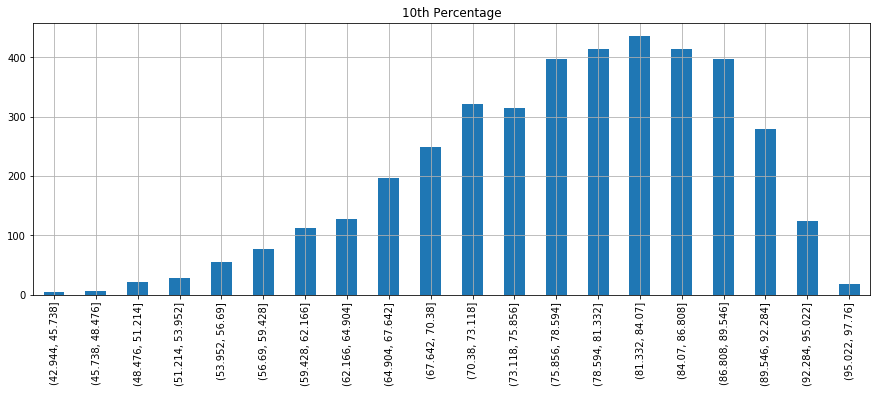

In [ ]:
data['10percentage'].value_counts(bins = 20, sort = False).plot(kind = 'bar', title = '10th Percentage', figsize = (15, 5), grid = True)

distribution of 12th percentage

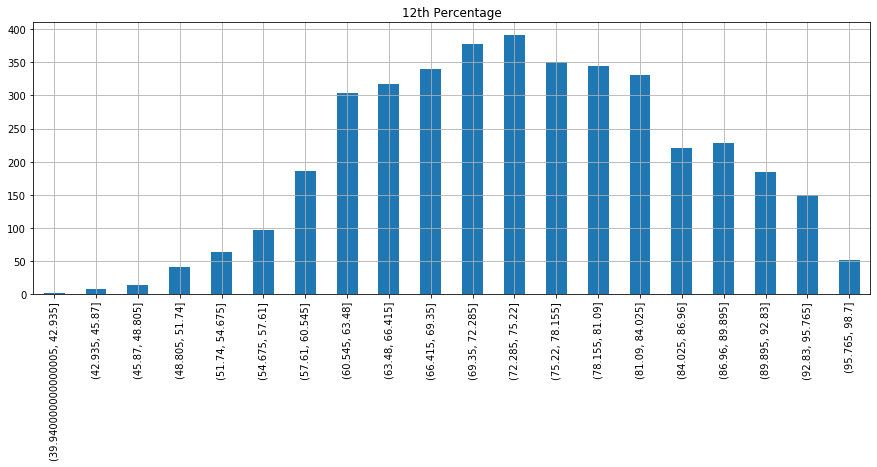

In [ ]:
data['12percentage'].value_counts(bins = 20, sort = False).plot(kind = 'bar', title = '12th Percentage', figsize = (15, 5), grid = True)

distribution of collage gradea

In [ ]:
data['collegeGPA'].value_counts(bins = 70, sort = False).plot(kind = 'bar', title = 'College Grades', figsize = (15, 5), grid = True)

NameError: ignored

salary distribution

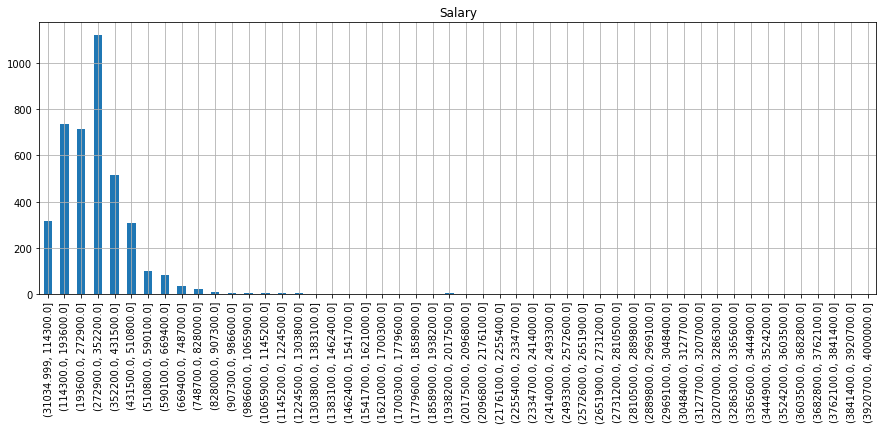

In [ ]:
data['Salary'].value_counts(bins = 50, sort = False).plot(kind = 'bar', title = 'Salary', figsize = (15, 5), grid = True)

corelation of personality scores

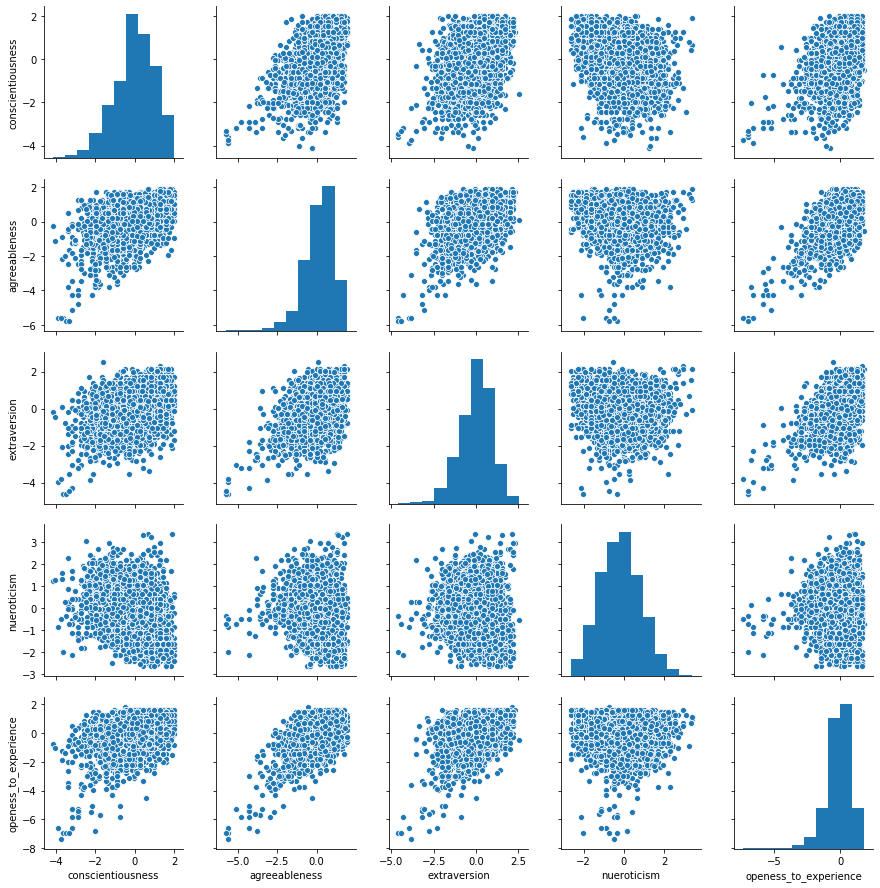

In [ ]:
sns.pairplot(data, vars = personality_scores)

accedamic scores corelation

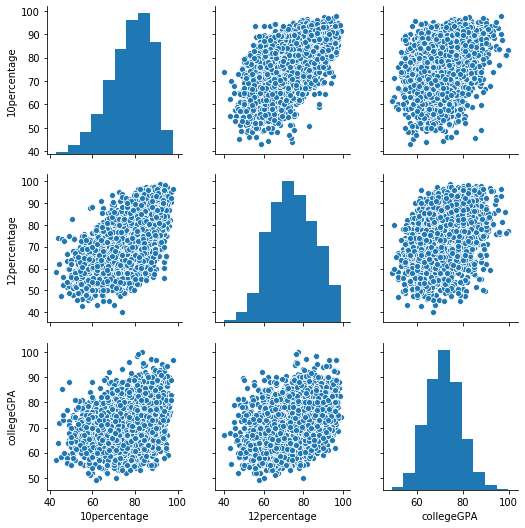

In [ ]:
sns.pairplot(data, vars = academic_scores)

standard test score corelation

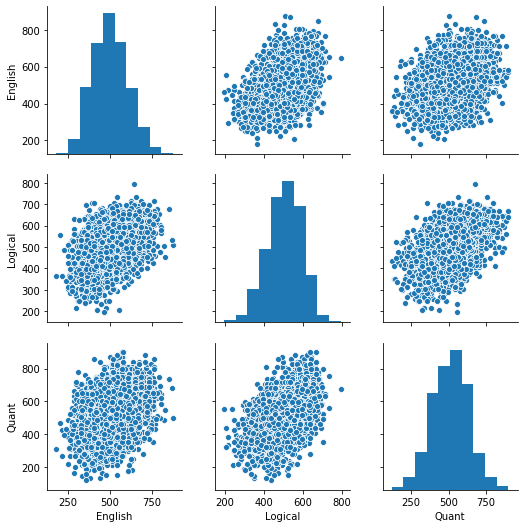

In [ ]:
sns.pairplot(data, vars = std_test_scores)

Distribution of College Tier


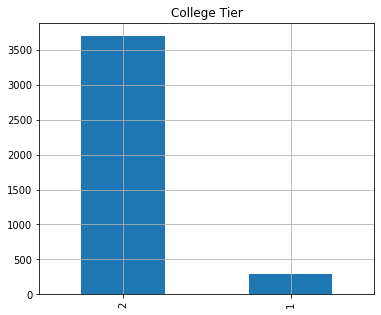

In [ ]:
data['CollegeTier'].value_counts().plot(kind = 'bar', title = 'College Tier', figsize = (6, 5), grid = True)

Distribution of Awarded Degree

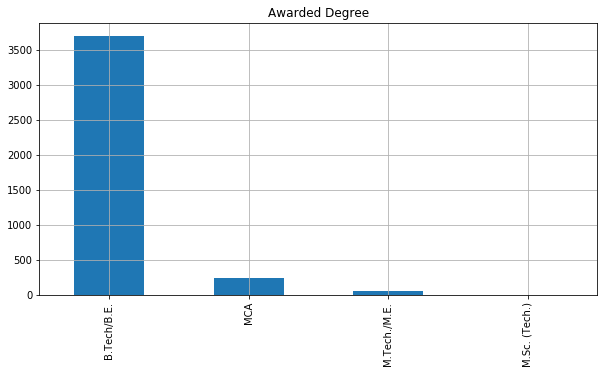

In [ ]:
data['Degree'].value_counts().plot(kind = 'bar', title = 'Awarded Degree', figsize = (10, 5), grid = True)


Does loaction of college affect salaries of graduates?

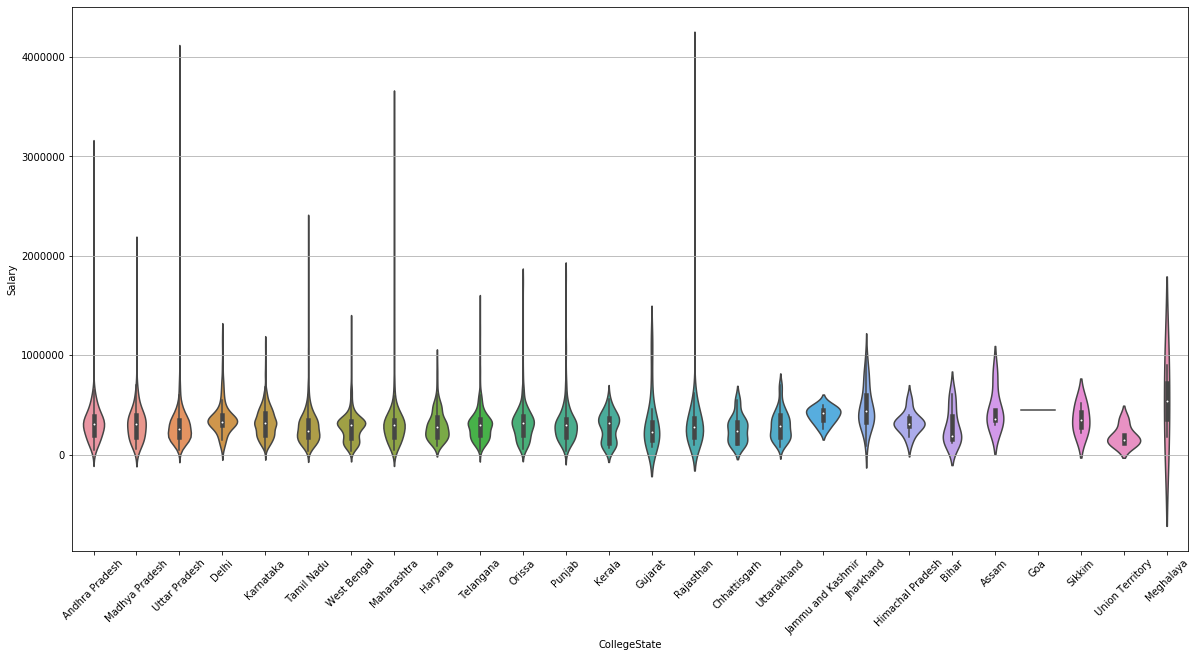

In [ ]:
ax = plt.figure(figsize = (20, 10))
ax = plt.xticks(rotation = 45)
ax = plt.grid(axis = 'y')
sns.violinplot(x = 'CollegeState', y = 'Salary', data = data)

Does gender affect salaries of graduates?

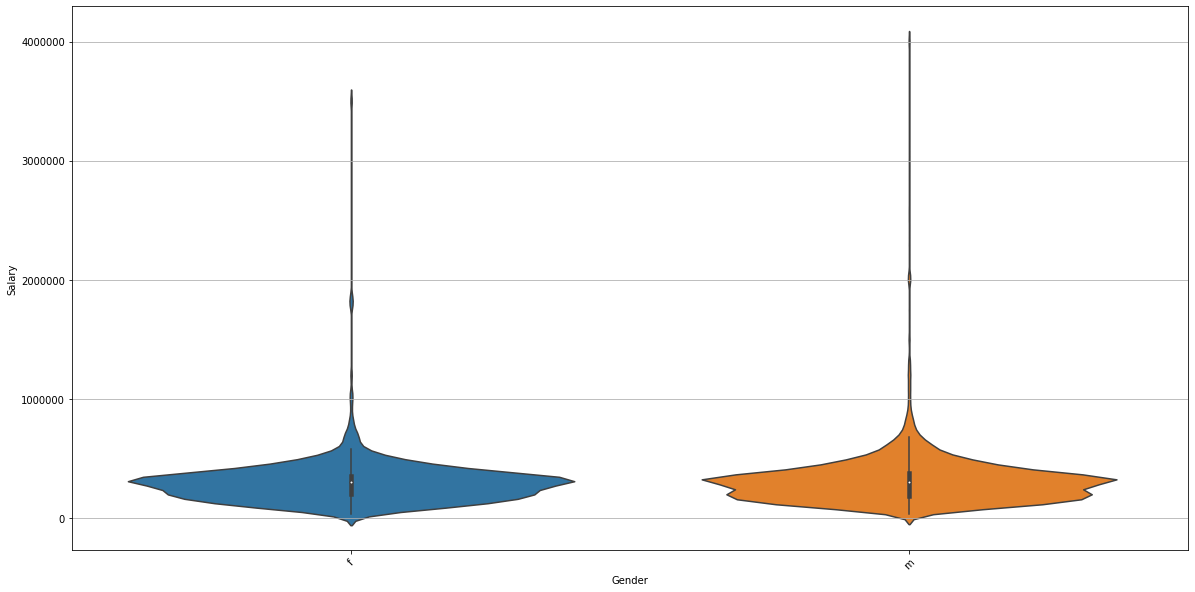

In [ ]:
ax = plt.figure(figsize = (20, 10))
ax = plt.xticks(rotation = 45)
ax = plt.grid(axis = 'y')
sns.violinplot(x = 'Gender', y = 'Salary', data = data)

Does year of graduation affect salaries of graduates?

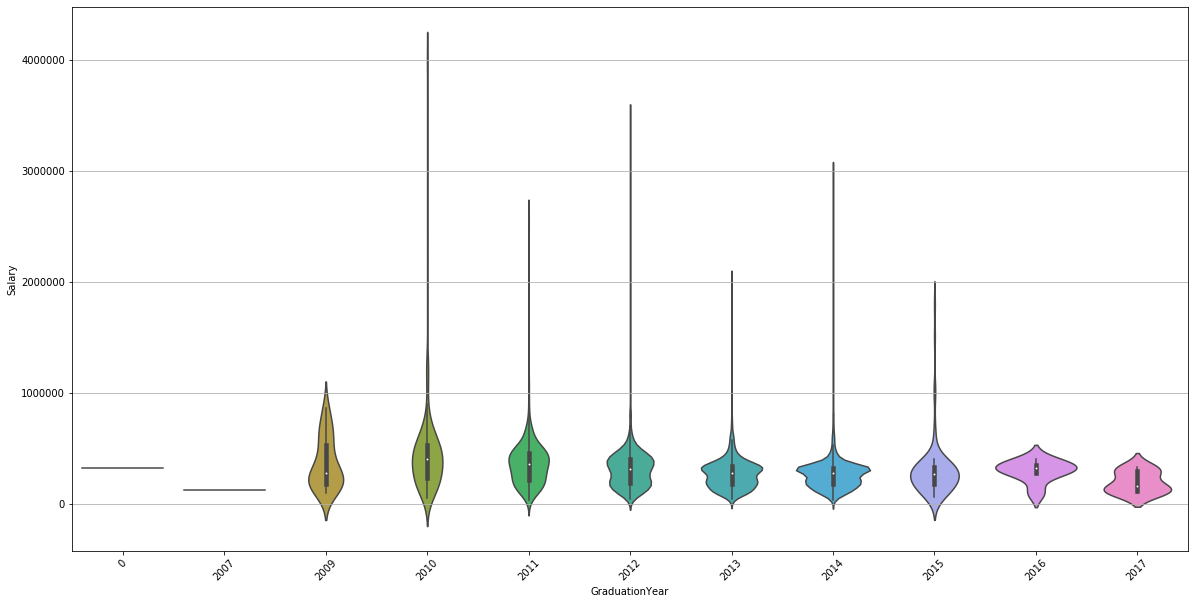

In [ ]:
ax = plt.figure(figsize = (20, 10))
ax = plt.xticks(rotation = 45)
ax = plt.grid(axis = 'y')
sns.violinplot(x = 'GraduationYear', y = 'Salary', data = data)

Does degree awarded affect salaries of graduates?

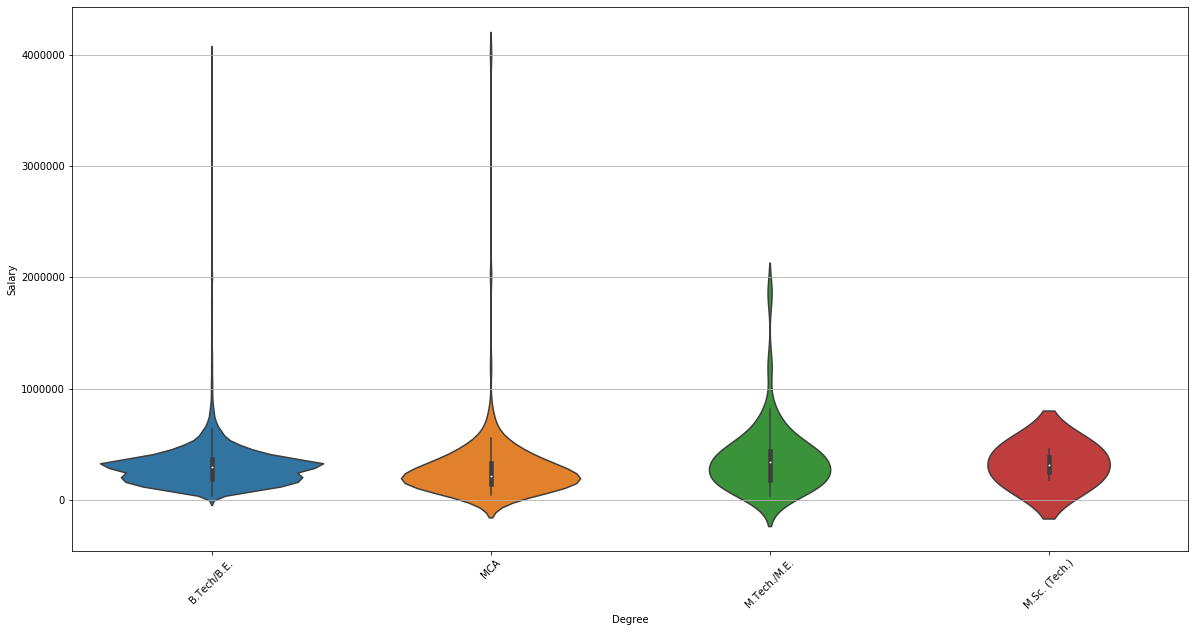

In [ ]:
ax = plt.figure(figsize = (20, 10))
ax = plt.xticks(rotation = 45)
ax = plt.grid(axis = 'y')
sns.violinplot(x = 'Degree', y = 'Salary', data = data)

In [ ]:
for i in cat_features:
    unique = len(data[i].unique())
    print("{}: {}".format(i, unique))

GraduationYear: 11
CollegeTier: 2
Gender: 2
Specialization: 6
CollegeState: 26
Degree: 4


In [ ]:
for feature in cat_features:
    data = pd.get_dummies(data, prefix = feature, columns = [feature])

In [ ]:
data.head()

,Unnamed: 0,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,GraduationYear_0,GraduationYear_2007,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017,CollegeTier_1,CollegeTier_2,Gender_f,Gender_m,Specialization_CE,Specialization_CS,Specialization_EC,Specialization_EL,Specialization_ME,Specialization_other,CollegeState_Andhra Pradesh,CollegeState_Assam,CollegeState_Bihar,CollegeState_Chhattisgarh,CollegeState_Delhi,CollegeState_Goa,CollegeState_Gujarat,CollegeState_Haryana,CollegeState_Himachal Pradesh,CollegeState_Jammu and Kashmir,CollegeState_Jharkhand,CollegeState_Karnataka,CollegeState_Kerala,CollegeState_Madhya Pradesh,CollegeState_Maharashtra,CollegeState_Meghalaya,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA
0,train,420000.0,84.3,95.8,78.00,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,train,500000.0,85.4,85.0,70.06,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,train,325000.0,85.0,68.2,70.00,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,train,1100000.0,85.6,83.6,74.64,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,train,200000.0,78.0,76.8,73.90,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


**salary distribution**

In [ ]:
y_cat = pd.qcut(data['Salary'], [0, .25, .5, .75, 1])

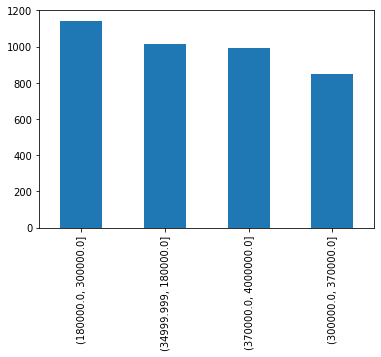

In [ ]:
y_cat.value_counts().plot(kind = 'bar')